# Tutorial Exercises - regression 6

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

### a. Load and inspect data

In [2]:
digital = pandas.read_csv('digital.csv')
digital

,age,eduyrs,home,skills,daily,inc4
0,76,12,No,0,0,Mid-high
1,50,16,No,8,1,Mid-high
2,51,11,Yes,5,1,Mid-high
3,70,17,Yes,0,1,Mid-low
4,48,12,Yes,4,1,Mid-low
...,...,...,...,...,...,...
10614,23,17,Yes,12,1,Mid-low
10615,64,14,Yes,0,0,Mid-high
10616,72,12,Yes,3,0,Mid-high
10617,33,16,Yes,5,1,Mid-high


### b. Replace 999 with NaN

In [3]:
# locate the offending items
np.sum(digital==999)

/opt/anaconda3/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


age         0
eduyrs      0
home        0
skills    123
daily      10
inc4        0
dtype: int64

In [4]:
# replace them
digital.loc[digital.skills==999,'skills']=np.nan
digital.loc[digital.daily==999,'daily']=np.nan

# check they've gone
np.sum(digital==999)

age       0
eduyrs    0
home      0
skills    0
daily     0
inc4      0
dtype: int64

In [5]:
# check Nans are there instead
digital.isna().sum()

age         0
eduyrs      0
home        0
skills    123
daily      10
inc4        0
dtype: int64

### c. Find outlier in `eduyrs`

In [6]:
# sort the values to find the outlier
digital.eduyrs.sort_values()

1520      0
2985      0
227       0
2319      0
1102      0
       ... 
7197     30
9464     30
7307     30
6649     30
10      112
Name: eduyrs, Length: 10619, dtype: int64

/opt/anaconda3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='eduyrs', ylabel='Count'>

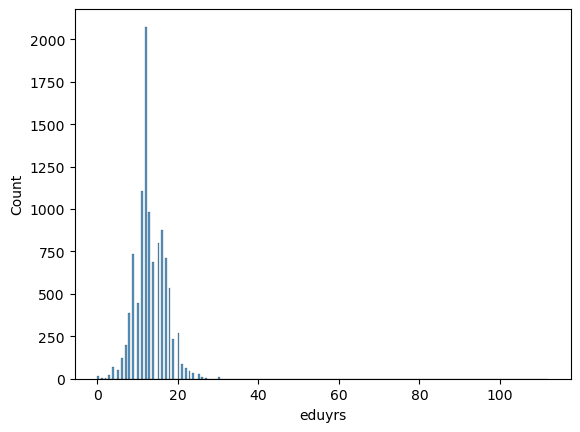

In [7]:
sns.histplot(data=digital, x='eduyrs')

In [8]:
# replace it with NaN
digital.loc[digital.eduyrs>100,'eduyrs']=np.nan

# check it's gone
digital.eduyrs.sort_values()

1102     0.0
2654     0.0
1017     0.0
1016     0.0
2934     0.0
        ... 
4631    30.0
5884    30.0
6649    30.0
7307    30.0
10       NaN
Name: eduyrs, Length: 10619, dtype: float64

**Note** we were informed that there was *one* unrealistic value to replace, hence sorting (to find the min and max values) is a good approach

If we didn't know how many outliers there might be, I would have checked for them by plotting the data instead

### d. Create a bar plot to show differences in mean digital skill level, by income. Comment on the results.

<Axes: xlabel='inc4', ylabel='skills'>

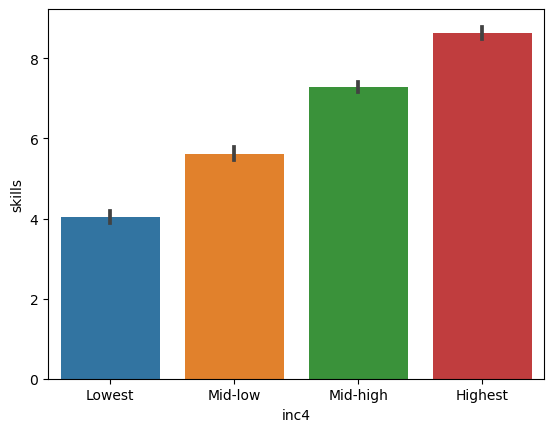

In [9]:
# use sns barplot; put bars in sensible order so pattern can be perceived
sns.barplot(data=digital, x='inc4', y='skills', order=['Lowest','Mid-low','Mid-high','Highest'])

**Comments** Digital skills increase as income increases

### e. Multiple linear regression analysis

Examine the association between digital skills $y$ and the following $x$ variables: age, eduyrs, daily and inc4.

In [10]:
# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = digital, formula = 'skills ~ age + eduyrs + daily + C(inc4) ')

# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 skills   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     1786.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:12:23   Log-Likelihood:                -26297.
No. Observations:               10485   AIC:                         5.261e+04
Df Residuals:                   10478   BIC:                         5.266e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.4845      0.191     28.770      0.000       5.111       5.858
C(inc4)[T.Lowest]      -1.4340      0.097    -14.803      0.000      -1.624      -1.244
C(inc4)[T.Mid-high]    -0.4350      0.087     -5.026      0.000      -0.605      -0.265
C(inc4)[T.Mid-low]     -1.0097      0.094    -10.708      0.000      -1.195      -0.825
age                    -0.0734      0.002    -38.762      0.000      -0.077      -0.070
eduyrs                  0.2542      0.009     29.860      0.000       0.238       0.271
daily                   2.9441      0.074     39.614      0.000       2.798       3.090
==============================================================================
Omnibus:                        8.325   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.644
Skew:                           0.046   Prob(JB):                       0.0133
Kurtosis:                       3.106   Cond. No.                         404.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation

**Mention the size, sign, and statistical significance of the slope coefficients.**

There is a negative effect of **age** such that for each additional year of age, skills decreased by 0.073 points (beta = -0.073). This was statistically significant (p<0.0005)

There is a positive effect of **eduyrs** such that for each additional year of education, skills increased by 0.25 points (beta = 0.25). This was statistically significant (p<0.0005)

There is a positive effect of **daily** internet use, such that fthose who used the internet daily had skills on average 2.9 points higher than those who did not (beta = 2.9). This was statistically significant (p<0.0005)

There is a positive effect of **income** on skills; all income catcgories had significantly higher mean skills that the **Lowest** income group, with skills increasing as income increased. People in the Mid-Low, Mid-High and Highesy income groups had on average skills 0.42, 1.0 and 1.4 points higher than those in the lowest groups (betas are 0.42, 1.0 and 1.4 respectively).  All differences from the reference category (Lowest) were statistically significant (p<0.0005)

**Report the R-squared and interpret.**

The adjusted R^2 is 0.505, meaning the model explains 50.5% of the varianbce in idigital skills; this is a pretty good model although some sources of variation remain uncaptured

### f. Causality

How good is the evidence, from this model, that the relationship between the daily internet use
and digital skills is a causal relationship?

Although there is a strong relationship between daily internet use and high digital skills, we cannot determine the direction of causality - maybe those with poor digital skills avoid internet use, maybe those who don't have access to the internet have poor digital skills as a consequence, or maybe there is a feedback loop.

The data are from a  cross sectional survey. To determine causality we should use an experiment in which people with low skills are randomly assigned to use the internet daily (or not). Or we could use a natural experiment in which some people don't have access to the internet for reasons outside their control. 

### g. Logistic regression

Using the variable ‘daily’ as the outcome variable, run a logistic regression model. Include the
following 𝑥 variables: age, eduyrs, inc4, and home

In [11]:
# create the logistic regression model and fit it
logistic_model = smf.logit('daily ~ age + eduyrs + inc4 + home', data=digital).fit()

# print out the summary table
logistic_model.summary()

Optimization terminated successfully.
         Current function value: 0.412818
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  daily   No. Observations:                10608
Model:                          Logit   Df Residuals:                    10601
Method:                           MLE   Df Model:                            6
Date:                Wed, 25 Sep 2024   Pseudo R-squ.:                  0.3395
Time:                        14:12:23   Log-Likelihood:                -4379.2
converged:                       True   LL-Null:                       -6630.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3572      0.199      1.797      0.072      -0.032       0.747
inc4[T.Lowest]      -1.1296      0.099    -11.459      0.000      -1.323      -0.936
inc4[T.Mid-high]    -0.5867      0.096     -6.127      0.000      -0.774      -0.399
inc4[T.Mid-low]     -0.9251      0.098     -9.484      0.000      -1.116      -0.734
home[T.Yes]          2.7490      0.105     26.164      0.000       2.543       2.955
age                 -0.0489      0.002    -27.552      0.000      -0.052      -0.045
eduyrs               0.1132      0.008     13.875      0.000       0.097       0.129
====================================================================================
"""

**i) Which of the explanatory variables are statistically significant?**

The effects of all the explanatory variables are significant (p<0.0005)

**ii) Report the odds ratios for each of the explanatory variables. Explain in words how to
interpret the odds ratio for home**

In [12]:
# obtain odd ratios by exponentiating log odds
np.exp(logistic_model.params)

Intercept            1.429362
inc4[T.Lowest]       0.323171
inc4[T.Mid-high]     0.556143
inc4[T.Mid-low]      0.396482
home[T.Yes]         15.627188
age                  0.952297
eduyrs               1.119899
dtype: float64

The odds ratios for each explanatory variable are given in the table above

For `home` the odds ratio is 15.6, meaning that those who have an internet connection at home are 15.6 times more likely to use the internet daily than those who do not.

For `eduyrs` the odds ratio is 1.12, meaning that each additional year of education is assoicated with being 1.12 times more likely to use the internet daily. 

For `age` the odds ratio is 0.95, meaning that each additional year of age is associated with being 5% less likely to use the internet daily. 

For `inc4` the odds ratios are all well below 1, showing that they are all less likely than the reference group (high income) to use the internet daily. For example, people in the lowest income group are 68% less likely (odds ratio of 0.32) compared to the high income group to use the internet daily.

**iii) What is the predicted probability of daily internet use for a person who is aged 75,
has 12 years of education, a low income, and no internet access at home?**

In [13]:
vals = dict(age=75, eduyrs=12, inc4='Lowest', home='No')

# Code for calculating predicted probability
logistic_model.predict(vals)

0    0.043966
dtype: float64

The predicted probability of daily internet use for this person is 4.3%

### h) Model log likelihood

Looking back at the model in g), say whether the log-likelihood of the fitted model is a significant
improvement compared to the null model.

Yes - as the LLL p-value is 0.000

In [14]:
digital.daily.mean()

0.6824394382128381

<Axes: xlabel='age', ylabel='skills'>

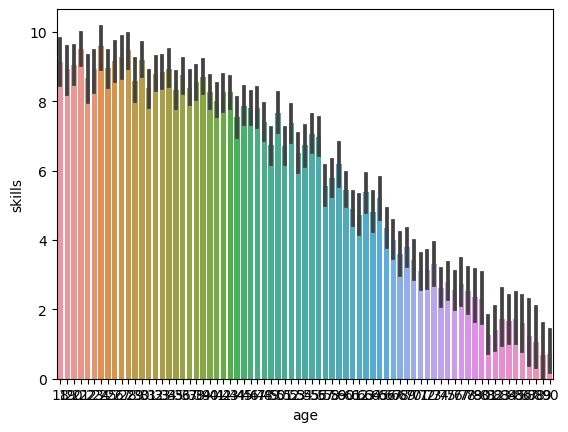

In [15]:
#plt.figure(figsize=[15,2])
sns.barplot(data=digital, x='age', y='skills')